In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, f_classif
from sklearn.model_selection import train_test_split,  GridSearchCV, KFold
from sklearn.ensemble import   RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [124]:
ligue_1 = pd.read_csv('ligue_1.csv')

In [125]:
ligue_1 = ligue_1.drop(columns= ['Div','FTHG','FTAG','HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR','Attendance','HomeTeamPoints', 'AwayTeamPoints'],axis=1)


In [126]:
encoder = LabelEncoder()
ligue_1['FTR']=encoder.fit_transform(ligue_1['FTR'])
ligue_1['HomeTeam']=encoder.fit_transform(ligue_1['HomeTeam'])
ligue_1['AwayTeam']=encoder.fit_transform(ligue_1['AwayTeam'])



#remove / from season
ligue_1['Season'] = ligue_1['Season'].str.replace('/','')
#extract the end 2 values of each year
ligue_1['Season'] = ligue_1['Season'].apply(lambda x: x[2] + x[3] + x[6] + x[7])
#convert to integer 
ligue_1['Season'] = ligue_1['Season'].astype(int)

ligue_1['PreCovid'] = ligue_1['PreCovid'].astype(int)

In [127]:
ligue_1 = ligue_1.iloc[:-380]

In [128]:
ligue_1

,Season,Date,HomeTeam,AwayTeam,FTR,HAGSFT,AAGSFT,HAGSHT,AAGSHT,HAGCFT,...,HALH,HADH,AAWA,AALA,AADA,PreCovid,OverallHA,SeasonalHA,HAPreCovid,HADuringCovid
0,910,08/08/09,5,31,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.5844,0.5352,0.5844,0.0000
1,910,08/08/09,13,20,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.7391,0.7391,0.7391,0.0000
2,910,08/08/09,15,19,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.7500,0.7500,0.7500,0.0000
3,910,08/08/09,22,34,2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.5559,0.6909,0.5601,0.5256
4,910,08/08/09,23,28,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.5969,0.5797,0.6092,0.4630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,1920,07/03/2020,26,22,2,1.857143,1.076923,1.142857,0.615385,1.357143,...,0.214286,0.285714,0.230769,0.384615,0.384615,1,0.6127,0.6829,0.6263,0.4615
4075,1920,07/03/2020,29,9,2,0.846154,1.000000,0.307692,0.384615,0.538462,...,0.153846,0.538462,0.153846,0.538462,0.307692,1,0.5897,0.5366,0.6074,0.4762
4076,1920,08/03/2020,32,7,1,1.076923,1.428571,0.538462,0.785714,1.307692,...,0.307692,0.384615,0.357143,0.357143,0.285714,1,0.5752,0.6000,0.5842,0.4565
4077,1920,08/03/2020,30,23,2,1.538462,0.692308,0.615385,0.307692,1.076923,...,0.230769,0.153846,0.076923,0.538462,0.384615,1,0.5610,0.5800,0.5637,0.5345


In [129]:
ligue_1_1920=ligue_1[ligue_1['Season']==1920]

In [130]:
ligue_1 = ligue_1.iloc[:-279]

In [131]:


# Define all unique teams in the dataset
all_teams = set(ligue_1_1920['HomeTeam']).union(set(ligue_1_1920['AwayTeam']))

# Define all unique team combinations for the 2019/2020 season (excluding same team combinations)
team_combinations = [(home_team, away_team) for home_team, away_team in product(all_teams, repeat=2) if home_team != away_team]

# Create a DataFrame with all unique team combinations for the 2019/2020 season
all_combinations_df = pd.DataFrame(team_combinations, columns=['HomeTeam', 'AwayTeam'])

# Filter out rows where HomeTeam and AwayTeam are the same
all_combinations_df = all_combinations_df[all_combinations_df['HomeTeam'] != all_combinations_df['AwayTeam']]

# Merge the original DataFrame with the DataFrame containing all combinations
result_df = pd.merge(all_combinations_df, ligue_1_1920, how='left', on=['HomeTeam', 'AwayTeam'])

# Select the rows where the match wasn't played (i.e., NaN values in the Season column)
missing_matches = result_df[result_df['Season'].isna()].copy()


# Sort the original DataFrame
ligue_1_1920 = ligue_1_1920.sort_values(by=['Season', 'HomeTeam', 'AwayTeam']).reset_index(drop=True)

# Concatenate the original DataFrame with the missing_matches DataFrame at the end
ligue_1_1920 = pd.concat([ligue_1_1920, missing_matches], ignore_index=True)

# Optionally, sort the DataFrame based on the columns
ligue_1_1920 = ligue_1_1920.sort_values(by=['Season', 'HomeTeam', 'AwayTeam']).reset_index(drop=True)


In [132]:
ligue_1_1920 = ligue_1_1920.sort_values(by='Date').reset_index(drop=True)

In [133]:
import pandas as pd


# Sort the DataFrame by Date only
ligue_1_1920 = ligue_1_1920.sort_values(by='Date').reset_index(drop=True)

# Fill NaN values in 'PreCovid' column with False
ligue_1_1920['PreCovid'].fillna(0, inplace=True)
ligue_1_1920['Season'].fillna(1920, inplace=True)

# Select columns for which you want to fill missing values
home_variables = ['HAC','HADH','HADuringCovid','HAF','HAGCFT', 'HAGSFT', 'HAGSHT', 'HALH',
                        'HAPreCovid', 'HAR','HAS', 'HAST','HAWH', 'HAY', 'OverallHA','SeasonalHA']  # Replace with your actual column names for home variables
away_variables = ['AAC', 'AADA','AAF','AAGCFT','AAGSFT','AAGSHT', 'AALA', 'AAR', 'AAS', 'AAST', 'AAWA', 'AAY',]  # Replace with your actual column names for away variables

for column in home_variables:
    ligue_1_1920[column] = ligue_1_1920.groupby('HomeTeam')[column].transform(lambda x: x.ffill().bfill())

# Iterate over each away variable and fill missing values with the oldest match's value for the away team
for column in away_variables:
    ligue_1_1920[column] = ligue_1_1920.groupby('AwayTeam')[column].transform(lambda x: x.ffill().bfill())

# Optionally, sort the DataFrame based on the columns
#ligue_1_1920 = ligue_1_1920.sort_values(by=['Season', 'HomeTeam', 'AwayTeam', 'Date']).reset_index(drop=True)

In [134]:
ligue_1_1920.dtypes

Season           float64
Date              object
HomeTeam           int64
AwayTeam           int64
FTR              float64
HAGSFT           float64
AAGSFT           float64
HAGSHT           float64
AAGSHT           float64
HAGCFT           float64
AAGCFT           float64
HAR              float64
AAR              float64
HAY              float64
AAY              float64
HAF              float64
AAF              float64
HAC              float64
AAC              float64
HAS              float64
AAS              float64
HAST             float64
AAST             float64
HAWH             float64
HALH             float64
HADH             float64
AAWA             float64
AALA             float64
AADA             float64
PreCovid         float64
OverallHA        float64
SeasonalHA       float64
HAPreCovid       float64
HADuringCovid    float64
dtype: object

In [135]:
ligue_1_1920=ligue_1_1920.drop('Date',axis=1)
ligue_1=ligue_1.drop('Date',axis=1)

In [136]:
ligue_1 = pd.merge(ligue_1, ligue_1_1920, how='outer')


In [137]:
ligue_1

,Season,HomeTeam,AwayTeam,FTR,HAGSFT,AAGSFT,HAGSHT,AAGSHT,HAGCFT,AAGCFT,...,HALH,HADH,AAWA,AALA,AADA,PreCovid,OverallHA,SeasonalHA,HAPreCovid,HADuringCovid
0,910.0,5,31,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5844,0.5352,0.5844,0.0000
1,910.0,13,20,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.7391,0.7391,0.7391,0.0000
2,910.0,15,19,1.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.7500,0.7500,0.7500,0.0000
3,910.0,22,34,2.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5559,0.6909,0.5601,0.5256
4,910.0,23,28,1.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5969,0.5797,0.6092,0.4630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1920.0,34,23,NaN,1.0,1.00,0.0,1.00,0.0,1.00,...,0.0,0.0,0.00,0.00,1.0,0.0,0.6081,0.6923,0.6081,0.0000
4176,1920.0,34,25,NaN,1.0,0.90,0.0,0.40,0.0,1.10,...,0.0,0.0,0.40,0.50,0.1,0.0,0.6081,0.6923,0.6081,0.0000
4177,1920.0,34,27,NaN,1.0,0.80,0.0,0.20,0.0,1.60,...,0.0,0.0,0.00,0.40,0.6,0.0,0.6081,0.6923,0.6081,0.0000
4178,1920.0,34,28,NaN,1.0,1.00,0.0,1.00,0.0,2.00,...,0.0,0.0,0.00,1.00,0.0,0.0,0.6081,0.6923,0.6081,0.0000


In [83]:
ligue_1.isnull().sum()

Season             0
HomeTeam           0
AwayTeam           0
FTR              101
HAGSFT             0
AAGSFT             0
HAGSHT             0
AAGSHT             0
HAGCFT             0
AAGCFT             0
HAR                0
AAR                0
HAY                0
AAY                0
HAF                0
AAF                0
HAC                0
AAC                0
HAS                0
AAS                0
HAST               0
AAST               0
HAWH               0
HALH               0
HADH               0
AAWA               0
AALA               0
AADA               0
PreCovid           0
OverallHA          0
SeasonalHA         0
HAPreCovid         0
HADuringCovid      0
dtype: int64

In [84]:
ligue_1

,Season,HomeTeam,AwayTeam,FTR,HAGSFT,AAGSFT,HAGSHT,AAGSHT,HAGCFT,AAGCFT,...,HALH,HADH,AAWA,AALA,AADA,PreCovid,OverallHA,SeasonalHA,HAPreCovid,HADuringCovid
0,910.0,5,31,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5844,0.5352,0.5844,0.0000
1,910.0,13,20,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.7391,0.7391,0.7391,0.0000
2,910.0,15,19,1.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.7500,0.7500,0.7500,0.0000
3,910.0,22,34,2.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5559,0.6909,0.5601,0.5256
4,910.0,23,28,1.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.00,0.0,1.0,0.5969,0.5797,0.6092,0.4630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1920.0,34,23,NaN,1.0,1.00,0.0,1.00,0.0,1.00,...,0.0,0.0,0.00,0.00,1.0,0.0,0.6081,0.6923,0.6081,0.0000
4176,1920.0,34,25,NaN,1.0,0.90,0.0,0.40,0.0,1.10,...,0.0,0.0,0.40,0.50,0.1,0.0,0.6081,0.6923,0.6081,0.0000
4177,1920.0,34,27,NaN,1.0,0.80,0.0,0.20,0.0,1.60,...,0.0,0.0,0.00,0.40,0.6,0.0,0.6081,0.6923,0.6081,0.0000
4178,1920.0,34,28,NaN,1.0,1.00,0.0,1.00,0.0,2.00,...,0.0,0.0,0.00,1.00,0.0,0.0,0.6081,0.6923,0.6081,0.0000


In [85]:
X=ligue_1.drop('FTR', axis=1)
y=ligue_1['FTR']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=101, shuffle =False)

In [91]:
#Scale variables 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlation

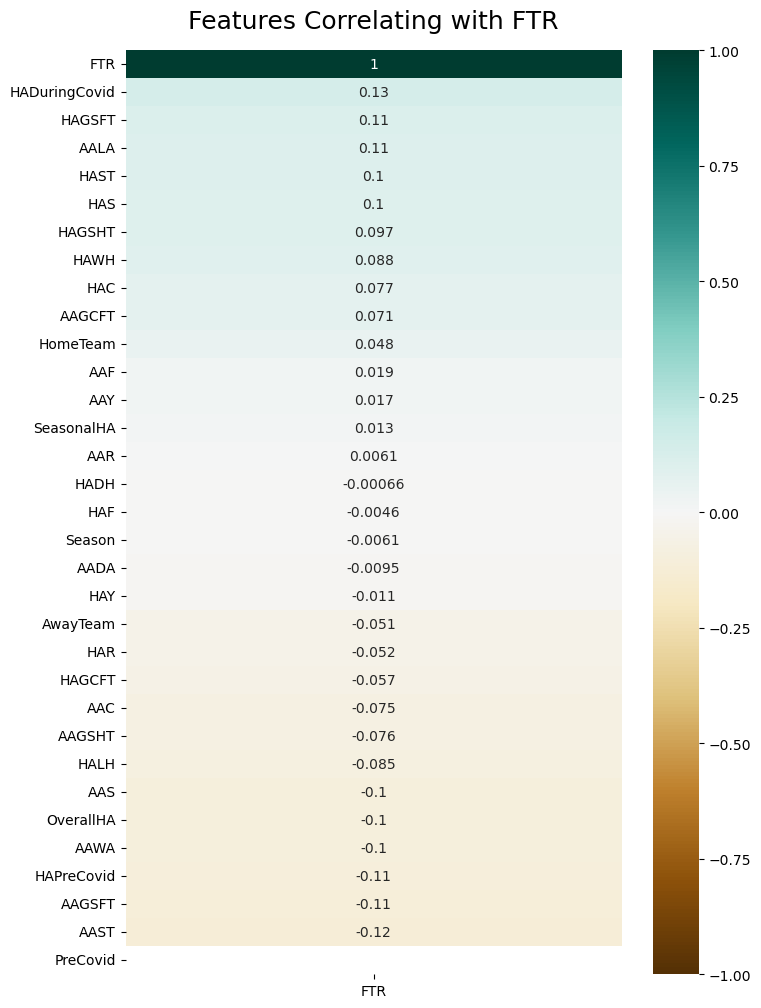

In [92]:
#Correlation with FTR 
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ligue_1.corr()[['FTR']].sort_values(by='FTR', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with FTR', fontdict={'fontsize':18}, pad=16);

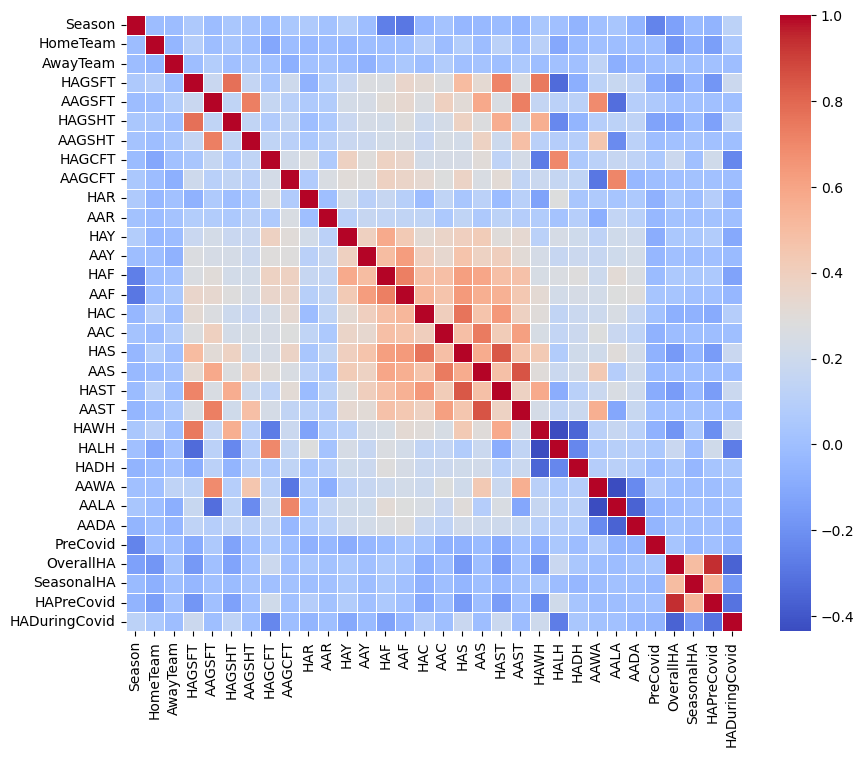

In [93]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, square=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.show()

In [94]:
correlation_matrix = X.corr()

# Find pairs of variables with correlation above 0.75
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlation_coefficient = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((colname_i, colname_j, correlation_coefficient))

# Print the pairs of variables and their correlation coefficients above 0.75
print("Pairs of variables with correlation above 0.75:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

Pairs of variables with correlation above 0.75:
HAGSHT and HAGSFT: 0.77
HAS and HAC: 0.76
HAST and HAS: 0.84
AAST and AAS: 0.85
HAPreCovid and OverallHA: 0.94


In [95]:
#features with high correlation removed 
#10 variables dropped
ligue_1 = ligue_1.drop(columns=['HAGSHT','HAS','AAS','HAPreCovid'],axis=1)

In [96]:
X=ligue_1.drop('FTR',axis=1)
y=ligue_1['FTR']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=101, shuffle =False)
#Scale variables 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

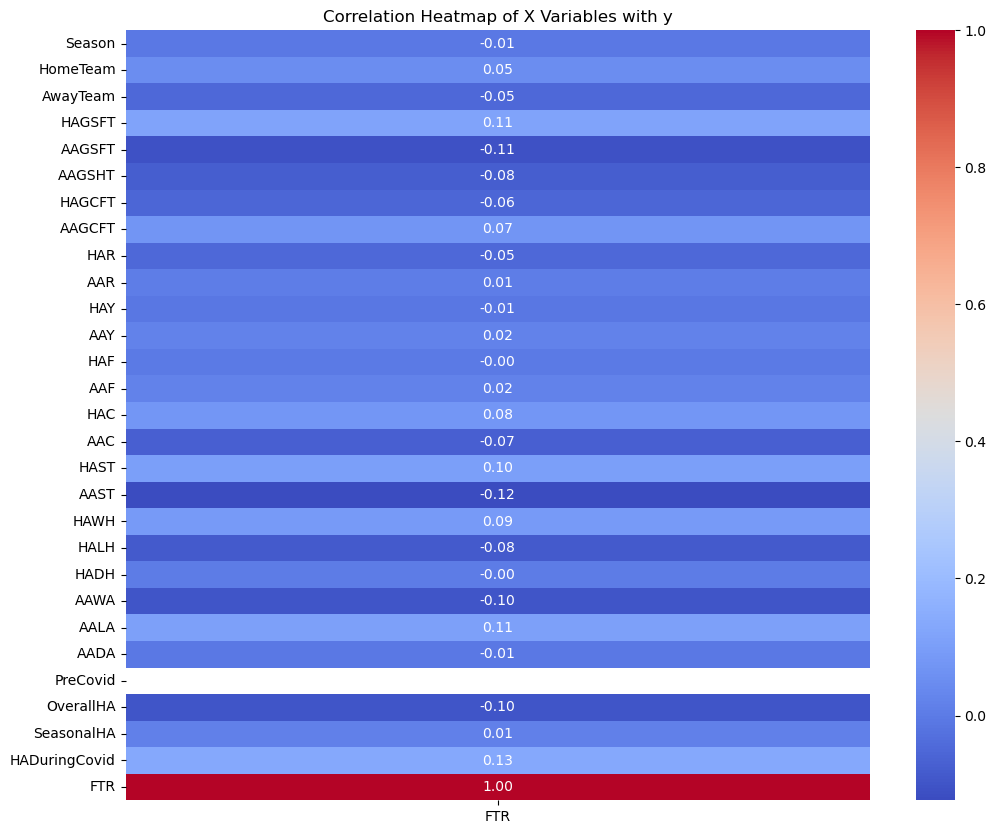

In [97]:
data = pd.concat([X, y], axis=1)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['FTR']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of X Variables with y')
plt.show()


In [104]:
# Set the correlation threshold
correlation_threshold = 0.1

# Extract variables with correlation greater than or equal to the threshold or less than or equal to -threshold
high_correlation_variables = correlation_matrix[abs(correlation_matrix['FTR']) > correlation_threshold]

# Print the list of variables and their rounded correlation values
print("Variables with correlation greater than or equal to 0.1 and less than or equal to -0.1 with FTR:")
for variable in high_correlation_variables.index:
    correlation_value = round(high_correlation_variables.loc[variable, 'FTR'], 2)
    print(f"{variable}: {correlation_value}")


Variables with correlation greater than or equal to 0.12 and less than or equal to -0.12 with FTR:
HAGSFT: 0.11
AAGSFT: -0.11
HAST: 0.1
AAST: -0.12
AAWA: -0.1
AALA: 0.11
OverallHA: -0.1
HADuringCovid: 0.13
FTR: 1.0


# Filter Method

In [105]:

# Use SelectKBest with ANOVA F-statistic to select the top k features

selector = SelectKBest(f_classif, k=5) #k=5 is the number of features to select
X_train_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Display the selected features
selected_features = X.columns[selected_feature_indices]
print(f"Top 5 Selected Features:")
print(selected_features)

ValueError: Input y contains NaN.

# LASSO

In [186]:


# Initialize the LassoCV model with a range of alpha values
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]  # Add more values based on your problem
lasso_cv_model = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Train the LassoCV model
lasso_cv_model.fit(X_train, y_train)

# Find the optimal alpha
optimal_alpha = lasso_cv_model.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Make predictions
y_pred = lasso_cv_model.predict(X_test)

# Evaluate the model
print("Lasso Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred.round()))
print("Classification Report:\n", classification_report(y_test, y_pred.round()))

Optimal alpha: 0.01
Lasso Regression Results:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0



C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c20

In [187]:
# Initialize the Lasso model with the optimal alpha
lasso_model = Lasso(alpha=optimal_alpha)

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = lasso_model.coef_
feature_names = X.columns  # Assuming X is a pandas DataFrame

# Create a dictionary mapping feature names to their absolute coefficients
feature_coefficients = dict(zip(feature_names, abs(coefficients)))

# Sort the features based on their absolute coefficients in descending order
sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 features
top_5_features = [feature for feature, _ in sorted_features[:5]]

print("Top 5 Features selected by Lasso:")
print(top_5_features)

Top 5 Features selected by Lasso:
['AAST', 'HADuringCovid', 'HAGSFT', 'HAC', 'OverallHA']


# RFE

Selected Features: Index(['HAF', 'AAF', 'HAST', 'AAST', 'SeasonalHA'], dtype='object')


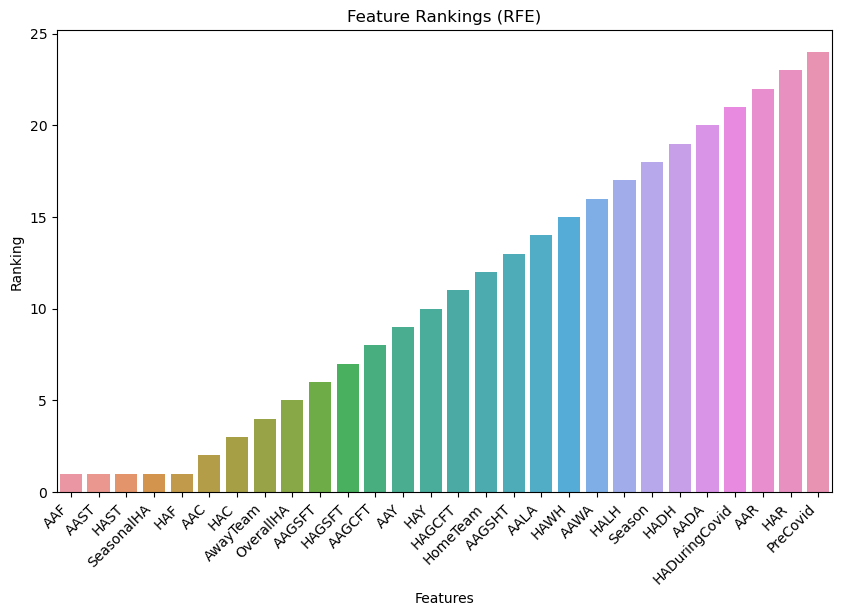

In [188]:

#Random Forest

# Initialize the model for RFE
model_rfe = RandomForestClassifier()

# Choose the number of features to select
num_features_to_select = 5

# Perform RFE
rfe = RFE(model_rfe, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Display selected features
X_columns = X.columns 

selected_features = X_columns[rfe.support_]
print("Selected Features:", selected_features)

# Plot feature rankings
feature_ranking = pd.Series(rfe.ranking_, index=X_columns)
feature_ranking_sorted = feature_ranking.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_ranking_sorted.index, y=feature_ranking_sorted.values)
plt.title("Feature Rankings (RFE)")
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.xticks(rotation=45, ha="right")
plt.show()

# Classification

In [196]:
#Implementing this 

X=ligue_1.drop('FTR', axis=1)
y= ligue_1['FTR']
#X = X[['AAST', 'HAST','HADuringCovid','HAGSFT','SeasonalHA']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=101, shuffle =False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [118]:
ligue_1.columns

Index(['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HAGSFT', 'AAGSFT', 'AAGSHT',
       'HAGCFT', 'AAGCFT', 'HAR', 'AAR', 'HAY', 'AAY', 'HAF', 'AAF', 'HAC',
       'AAC', 'HAST', 'AAST', 'HAWH', 'HALH', 'HADH', 'AAWA', 'AALA', 'AADA',
       'PreCovid', 'OverallHA', 'SeasonalHA', 'HADuringCovid'],
      dtype='object')

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is named combined_df
# Replace 'feature_columns' with the actual feature columns in your dataset
feature_columns = ['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HAGSFT', 'AAGSFT', 'AAGSHT',
       'HAGCFT', 'AAGCFT', 'HAR', 'AAR', 'HAY', 'AAY', 'HAF', 'AAF', 'HAC',
       'AAC', 'HAST', 'AAST', 'HAWH', 'HALH', 'HADH', 'AAWA', 'AALA', 'AADA',
       'PreCovid', 'OverallHA', 'SeasonalHA', 'HADuringCovid']

# Separate data into training (non-NaN) and testing (NaN) sets
train_data = ligue_1.dropna(subset=['FTR'])
test_data = ligue_1[ligue_1['FTR'].isna()]

# Extract features and target variable for training
X_train = train_data[feature_columns]
y_train = train_data['FTR']

# Extract features for testing
X_test = test_data[feature_columns]

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set (rows with NaN in FTR)
y_test_predicted = model.predict(X_test_imputed)

# Update the original DataFrame with predicted values
ligue_1.loc[ligue_1['FTR'].isna(), 'FTR'] = y_test_predicted

# Print the updated DataFrame or specific information as needed
print(ligue_1)


      Season  HomeTeam  AwayTeam  FTR  HAGSFT  AAGSFT  HAGSHT  AAGSHT  HAGCFT  \
0      910.0         5        31  0.0     0.0    0.00     0.0    0.00     0.0   
1      910.0        13        20  0.0     0.0    0.00     0.0    0.00     0.0   
2      910.0        15        19  1.0     0.0    0.00     0.0    0.00     0.0   
3      910.0        22        34  2.0     0.0    0.00     0.0    0.00     0.0   
4      910.0        23        28  1.0     0.0    0.00     0.0    0.00     0.0   
...      ...       ...       ...  ...     ...     ...     ...     ...     ...   
4175  1920.0        34        23  1.0     1.0    1.00     0.0    1.00     0.0   
4176  1920.0        34        25  1.0     1.0    0.90     0.0    0.40     0.0   
4177  1920.0        34        27  2.0     1.0    0.80     0.0    0.20     0.0   
4178  1920.0        34        28  2.0     1.0    1.00     0.0    1.00     0.0   
4179  1920.0        34        32  2.0     1.0    0.75     0.0    0.75     0.0   

      AAGCFT  ...  HALH  HA

C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, X_test, y_train, and combined_df are already defined



# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_test_predicted = model.predict(X_test)

# Update the original DataFrame with predicted values
ligue_1.loc[ligue_1['FTR'].isna(), 'FTR'] = y_test_predicted

# Print the updated DataFrame or specific information as needed
print(ligue_1.iloc[:101])


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Must have equal len keys and value when setting with an iterable

In [110]:
print("Predicted Values:")
print(y_train_predicted)

print("Indices where imputation was done:")
print(y_train.index)


Predicted Values:
[2. 2. 2. ... 0. 2. 2.]
Indices where imputation was done:
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078],
      dtype='int64', length=4079)


In [198]:
ligue_1

,Season,HomeTeam,AwayTeam,FTR,HAGSFT,AAGSFT,AAGSHT,HAGCFT,AAGCFT,HAR,...,HAWH,HALH,HADH,AAWA,AALA,AADA,PreCovid,OverallHA,SeasonalHA,HADuringCovid
0,910,5,31,0,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,1,0.5844,0.5352,0.0000
1,910,13,20,0,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,1,0.7391,0.7391,0.0000
2,910,15,19,1,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,1,0.7500,0.7500,0.0000
3,910,22,34,2,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,1,0.5559,0.6909,0.5256
4,910,23,28,1,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,1,0.5969,0.5797,0.4630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,1920,34,23,3,1.0,1.00,1.00,0.0,1.00,0.0,...,1.0,0.0,0.0,0.00,0.00,1.0,0,0.6081,0.6923,0.0000
4176,1920,34,25,3,1.0,0.90,0.40,0.0,1.10,0.0,...,1.0,0.0,0.0,0.40,0.50,0.1,0,0.6081,0.6923,0.0000
4177,1920,34,27,3,1.0,0.80,0.20,0.0,1.60,0.0,...,1.0,0.0,0.0,0.00,0.40,0.6,0,0.6081,0.6923,0.0000
4178,1920,34,28,3,1.0,1.00,1.00,0.0,2.00,0.0,...,1.0,0.0,0.0,0.00,1.00,0.0,0,0.6081,0.6923,0.0000


In [197]:
log = LogisticRegression(max_iter=100000)

model_log = log.fit(X_train, y_train)

pred_log = model_log.predict(X_test)

accuray = accuracy_score(y_test, pred_log)
precision = precision_score(y_test, pred_log, average='weighted')
recall = recall_score(y_test, pred_log, average='weighted')
f1 = f1_score(y_test, pred_log, average='weighted')

print("The classification report of Logistic Regression classification: \n",classification_report(y_test, pred_log))


print("From the class report we can see that the classification has precision of {}%, with a recall of {}%, an f1-score of {}.".format(round(precision*100,2), round(recall*100, 2), f1))
print("The accuracy of the model is {}%".format(round(accuray*100,2)))

The classification report of Logistic Regression classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0

From the class report we can see that the classification has precision of 0.0%, with a recall of 0.0%, an f1-score of 0.0.
The accuracy of the model is 0.0%


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anacon

In [192]:
dt = DecisionTreeClassifier()

model_dt = dt.fit(X_train,y_train)

pred_dt = model_dt.predict(X_test)

accuray = accuracy_score(y_test, pred_dt)
precision = precision_score(y_test, pred_dt, average='weighted')
recall = recall_score(y_test, pred_dt, average='weighted')
f1 = f1_score(y_test, pred_dt, average='weighted')

print("The classification report of Decision Tree classification: \n",classification_report(y_test, pred_dt))


print("From the class report we can see that the classification has precision of {}%, with a recall of {}%, an f1-score of {}.".format(round(precision*100,2), round(recall*100, 2), f1))
print("The accuracy of the model is {}%".format(round(accuray*100,2)))

The classification report of Decision Tree classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0

From the class report we can see that the classification has precision of 0.0%, with a recall of 0.0%, an f1-score of 0.0.
The accuracy of the model is 0.0%


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anacon

In [193]:
nb = GaussianNB()

model_nb = nb.fit(X_train,y_train)

pred_nb = model_nb.predict(X_test)

accuray = accuracy_score(y_test, pred_nb)
precision = precision_score(y_test, pred_nb, average='weighted')
recall = recall_score(y_test, pred_nb, average='weighted')
f1 = f1_score(y_test, pred_nb, average='weighted')

print("The classification report of Naive Bayes classification: \n",classification_report(y_test, pred_nb))


print("From the class report we can see that the classification has precision of {}%, with a recall of {}%, an f1-score of {}.".format(round(precision*100,2), round(recall*100, 2), f1))
print("The accuracy of the model is {}%".format(round(accuray*100,2)))

The classification report of Naive Bayes classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0

From the class report we can see that the classification has precision of 0.0%, with a recall of 0.0%, an f1-score of 0.0.
The accuracy of the model is 0.0%


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anacon

In [194]:
svm = SVC()

model_svc = svm.fit(X_train,y_train)

pred_svc = model_svc.predict(X_test)

accuray = accuracy_score(y_test, pred_svc)
precision = precision_score(y_test, pred_svc, average='weighted')
recall = recall_score(y_test, pred_svc, average='weighted')
f1 = f1_score(y_test, pred_svc, average='weighted')

print("The classification report of Support Vector Machine classification: \n",classification_report(y_test, pred_svc))


print("From the class report we can see that the classification has precision of {}%, with a recall of {}%, an f1-score of {}.".format(round(precision*100,2), round(recall*100, 2), f1))
print("The accuracy of the model is {}%".format(round(accuray*100,2)))

The classification report of Support Vector Machine classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0

From the class report we can see that the classification has precision of 0.0%, with a recall of 0.0%, an f1-score of 0.0.
The accuracy of the model is 0.0%


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anacon

In [195]:
rf = RandomForestClassifier()

model_rf = rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)

accuray = accuracy_score(y_test, pred_rf)
precision = precision_score(y_test, pred_rf, average='weighted')
recall = recall_score(y_test, pred_rf, average='weighted')
f1 = f1_score(y_test, pred_rf, average='weighted')

print("The classification report of Random Forest classification: \n",classification_report(y_test, pred_rf))


print("From the class report we can see that the classification has precision of {}%, with a recall of {}%, an f1-score of {}.".format(round(precision*100,2), round(recall*100, 2), f1))
print("The accuracy of the model is {}%".format(round(accuray*100,2)))

The classification report of Random Forest classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     101.0

    accuracy                           0.00     101.0
   macro avg       0.00      0.00      0.00     101.0
weighted avg       0.00      0.00      0.00     101.0

From the class report we can see that the classification has precision of 0.0%, with a recall of 0.0%, an f1-score of 0.0.
The accuracy of the model is 0.0%


C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\c2002942\AppData\Local\anacon